In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dados = {'x':[25,34,22,27,54,33,33,31,22,34,34,54,57,43,69,65,23,87,67,56,45],
     'y':[79,51,53,67,45,76,89,67,34,78,98,78,56,65,44,56,55,78,34,23,11]}

In [6]:
df = pd.DataFrame(dados, columns = ['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,67
4,54,45


# KMEANS

In [7]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
centroides = kmeans.cluster_centers_
print(centroides)

[[62.5        43.375     ]
 [31.92307692 68.46153846]]


Text(0, 0.5, 'y')

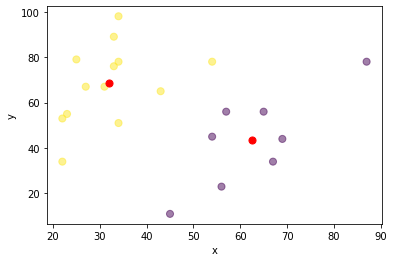

In [19]:
plt.scatter(df['x'],df['y'],c = kmeans.labels_.astype(float),s = 50,alpha = 0.5)
plt.scatter(centroides[:,0],centroides[:,1],c = 'red',s = 50)
plt.xlabel("x")
plt.ylabel('y')

# KNEAREST NEIGHBORS

In [20]:
#IMPORTANDO DATASETS
from sklearn import neighbors, datasets
import pylab as pl

In [22]:
iris = datasets.load_iris()

In [27]:
df = pd.DataFrame(data = np.c_[iris['data'],iris['target']], columns = iris['feature_names'] + ['taget'])

In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),taget
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [30]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [34]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test)

In [56]:
y_pred

array([1., 0., 1., 1., 1., 0., 0., 2., 0., 2., 1., 0., 2., 1., 2., 1., 1.,
       1., 2., 1., 1., 2., 0., 1., 0., 0., 0., 2., 1., 0.])

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  0  0]
 [ 0 11  1]
 [ 0  2  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.85      0.92      0.88        12
         2.0       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



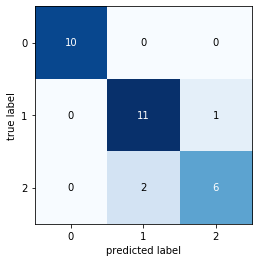

In [62]:
matriz_confusao = confusion_matrix(y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# DECISION TREES

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [69]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

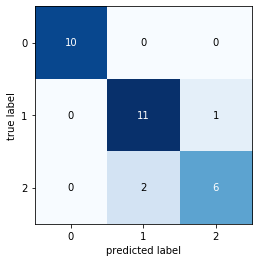

In [70]:
matriz_confusao = confusion_matrix(y_test,y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig,ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

# SUPPOT VECTOR MACHINE

In [71]:
from sklearn.svm import SVC

In [72]:
svc = SVC(gamma = 'auto')

In [73]:
svc.fit(X_train,y_train)

SVC(gamma='auto')